# Exploretory data analysis on risk factors involved in investment by Deutch Bank

## Background
Deutsche Bank is a multinational investment bank and financial services company. It offers a range of investment products to its clients, including stocks, bonds, and derivatives. The bank is concerned about the risk of investment in various products and wants to use data analysis to identify and manage potential risks.

## Objective

To perform data analysis on the investment products offered by Deutsche Bank and identify potential risks associated with each product.

Technical chart for the reliance industries: 

1. MACD
2. Momentum (MOM)
3. Stochastic (STO)
4. CCI

## Deutsch Bank share
With this dataset, we could perform a wide range of analyses and visualizations to understand how the stock price of Deutsche Bank has changed over time, and to identify trends or patterns in the data. 

For example, we could:

- Create a line chart showing the daily closing price of the stock over time.
- Calculate the daily percentage change in the stock price, and create a histogram or density plot to visualize the distribution of these changes.
- Use technical analysis tools to identify patterns or trends in the stock price, such as moving averages or support/resistance levels.
- Perform a regression analysis to model the relationship between the stock price and other variables, such as market indices or macroeconomic indicators.
- Use machine learning algorithms to predict future stock prices based on historical data.

So, I will start with few basic things with these datas over time and compare them with each other.

1. **Basic data exploration:** You can use pandas to perform basic exploration of the data, such as checking the dimensions of the DataFrame, looking at summary statistics, or checking for missing values
    - summary statistics: `.describe()`
    - dimensions of the DataFrame: `.shape()`
    - check for missing values: `.isnull().sum())`
2. Visualize the data using matplotlib and seaborn

3. Calculate returns

4. Analyze relationships between variables

5. Rolling statistics

### About data

To begin the analysis, the bank collects data on its investment products over the past 10 years. The data includes information on the product type, issuer, maturity date, credit rating, and other relevant factors that could impact risk.

**Table summary:**

| Sr. No. | Date | Open | High | Low | Close | Adj Close | Volume |
|---------|------|------|------|-----|-------|-----------|--------|
| ||||||||

Here individual columns are

| Column name | Description |
|-------------|-------------|
| Date | The date of the stock price, in a standardized format (e.g. YYYY-MM-DD). |
| Open | The opening price of the stock on that day. | 
| High |  The highest price of the stock on that day. |
| Low | The lowest price of the stock on that day. |
| Close | The closing price of the stock on that day. |
| Adj Close | The adjusted closing price of the stock on that day. This takes into account any corporate actions (such as stock splits or dividends) that may have affected the stock price. |
| Volume | The volume of shares traded on that day. |

### Data Download & preparation for analysis

In [ ]:
# Change this
dataset_url = 'https://investor-relations.db.com/share/share-information/historical-share-prices'

In [ ]:
import opendatasets as od
od.download(dataset_url)

In [ ]:
# Change this
data_dir = 'dbdata'

In [ ]:
# Now listing the downloaded files 
import os
os.listdir(data_dir)

In [ ]:
project_name = "Deutch-bank-share" # change this (use lowercase letters and hyphens only)

### Importing important libraries

1. **Numpy:** NumPy is a Python library for scientific computing that provides support for arrays, matrices, and mathematical functions. It is one of the most widely used libraries in the scientific Python ecosystem, and is a fundamental building block for many other Python libraries. NumPy provides the ndarray (n-dimensional array) data structure, which is a collection of elements of the same type, indexed by a tuple of non-negative integers. NumPy also provides a large number of mathematical functions for manipulating arrays, such as mathematical operations (addition, subtraction, multiplication, division, etc.), statistical operations (mean, variance, standard deviation, etc.), and linear algebra operations (matrix multiplication, eigenvalues, etc.).

2. **Pandas:** Pandas is an open-source Python library that is widely used for data manipulation and analysis. One of the most popular features of Pandas is the DataFrame. It is a two-dimensional table-like data structure that allows you to store and manipulate data in a way that is similar to a spreadsheet. A DataFrame consists of rows and columns, where each row represents a unique observation or record, and each column represents a variable or feature of that observation. You can think of a DataFrame as a spreadsheet, where each row is a record, and each column is a field.

3. **Matplotlib:** Matplotlib is a Python library for data visualization that provides a wide range of tools for creating different types of charts and plots. It is one of the most widely used visualization libraries in the scientific Python ecosystem. Matplotlib provides a variety of functions and classes for creating visualizations, such as scatter plots, line charts, bar charts, histograms, and more. These visualizations can be customized in many ways, including changing the colors, labels, axes, and annotations.

4. **Seaborn:** Seaborn is a Python data visualization library built on top of Matplotlib that provides a high-level interface for creating informative and attractive statistical graphics. It provides a range of functions for visualizing data, including categorical data, relational data, and distributional data. Seaborn includes several built-in datasets that can be loaded directly into a DataFrame, making it easy to get started with visualization. The library also provides a variety of options for customizing charts and plots, such as color palettes, themes, and styles.


In this tutorial, we will learn how to create and manipulate DataFrames using and plot using matplotlib/seaborn python libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
# plt.style.use('ggplot')

In [116]:
# for reading xlr datafile
%pip install xlrd --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [117]:
%pip install --upgrade pandas-datareader --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import datetime

#### Creating a DataFrame

In [3]:
# Imorting files
dbbank_df1 = pd.read_csv('deutschebank_share_prices.csv')

In [4]:
dbbank_df1.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Deutsche Bank share prices,NaN,NaN,NaN,NaN,NaN
3,Frankfurt (EUR),NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,Date,Open,High,Low,Close,Volume (shares)
6,11/28/1997,43.93,44.04,43.71,43.79,"3,196,812"
7,12/01/1997,44.53,44.82,44.41,44.49,"4,185,032"
8,12/02/1997,45.01,45.05,44.45,44.53,"3,881,885"
9,12/03/1997,43.89,44.33,43.66,44.33,"4,823,253"


#### New approach 

So we are seeing that rows 0-4 are not required. So we need to drop them. Instead of using above data read file, we will use following:

In [5]:
# Read the CSV file and skip the fourth and fifth rows
dbbank_df = pd.read_csv('deutschebank_share_prices.csv', header=4, skiprows=[5])

# Set the values in the fifth row as the column names
dbbank_df.columns = dbbank_df.iloc[0]
dbbank_df = dbbank_df[1:]


It may also possible to import data with date as a index directly by using following code.

`dbbank_df = pd.read_csv('deutschebank_share_prices.csv', header=4, skiprows=[5], index_col=5, parse_dates=True)`

In [6]:
# Display the resulting DataFrame
dbbank_df.head()

,Date,Open,High,Low,Close,Volume (shares)
1,11/28/1997,43.93,44.04,43.71,43.79,"3,196,812"
2,12/01/1997,44.53,44.82,44.41,44.49,"4,185,032"
3,12/02/1997,45.01,45.05,44.45,44.53,"3,881,885"
4,12/03/1997,43.89,44.33,43.66,44.33,"4,823,253"
5,12/04/1997,44.47,44.95,44.10,44.66,"4,539,136"


In [7]:
# displaying the column names
dbbank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume (shares)'], dtype='object', name=0)

We need to rename the Volumn column.

In [8]:
# Rename the 'Volume(Share)' column to 'Volume'
dbbank_df = dbbank_df.rename(columns={'Volume (shares)': 'Volume'})
dbbank_df

,Date,Open,High,Low,Close,Volume
1,11/28/1997,43.93,44.04,43.71,43.79,"3,196,812"
2,12/01/1997,44.53,44.82,44.41,44.49,"4,185,032"
3,12/02/1997,45.01,45.05,44.45,44.53,"3,881,885"
4,12/03/1997,43.89,44.33,43.66,44.33,"4,823,253"
5,12/04/1997,44.47,44.95,44.10,44.66,"4,539,136"
...,...,...,...,...,...,...
6393,02/13/2023,11.32,11.42,11.30,11.41,"30,606"
6394,02/14/2023,11.38,11.60,11.38,11.58,"26,132"
6395,02/15/2023,11.56,11.56,11.40,11.42,"9,519"
6396,02/16/2023,11.49,11.85,11.49,11.77,"38,652"


Now we want to change Date as index.

In [9]:
# Convert the 'Date' column to datetime format
dbbank_df['Date'] = pd.to_datetime(dbbank_df['Date'])

# Set the 'Date' column as the index column
dbbank_df = dbbank_df.set_index('Date')

In [ ]:
# # Set the "Date" column as the index of the DataFrame
#dbbank_df.set_index(dbbank_df['Date'], inplace=True)

In [10]:
dbbank_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1997-11-28,43.93,44.04,43.71,43.79,"3,196,812"
1997-12-01,44.53,44.82,44.41,44.49,"4,185,032"
1997-12-02,45.01,45.05,44.45,44.53,"3,881,885"
1997-12-03,43.89,44.33,43.66,44.33,"4,823,253"
1997-12-04,44.47,44.95,44.10,44.66,"4,539,136"


In [13]:
# Now checking the index
dbbank_df.index

DatetimeIndex(['1997-11-28', '1997-12-01', '1997-12-02', '1997-12-03',
               '1997-12-04', '1997-12-05', '1997-12-08', '1997-12-09',
               '1997-12-10', '1997-12-11',
               ...
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-13', '2023-02-14', '2023-02-15',
               '2023-02-16', '2023-02-17'],
              dtype='datetime64[ns]', name='Date', length=6397, freq=None)

In [14]:
# checking missing values i.e. NaN valuess
dbbank_df.isnull().sum()

0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

so good thing is we don't have any missing values in the dataframe of dbabnk.

In [16]:
# column names in the dataframe
dbbank_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object', name=0)

In [17]:
# datatype of each column
dbbank_df.dtypes

0
Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object

so we find that datee is object type and all other columns are of object type so we need to convert them to appropriate data type. 

In [19]:
# converting datatype of 'Open' column to float
dbbank_df['Open'] = dbbank_df['Open'].astype(float)

In [20]:
# converting datatype of 'Close' column to float
dbbank_df['Close'] = dbbank_df['Close'].astype(float)

In [21]:
# converting datatype of 'High' column to float
dbbank_df['High'] = dbbank_df['High'].astype(float)

In [22]:
# converting datatype of 'Low' column to float
dbbank_df['Low'] = dbbank_df['Low'].astype(float)

In [23]:
# Since, numbers in Volumn column contains, comma. We need to remove
# Replace commas with empty strings
dbbank_df['Volume'] = dbbank_df['Volume'].str.replace(',', '')

# Convert to float
dbbank_df['Volume'] = dbbank_df['Volume'].astype(int)

In [24]:
dbbank_df.dtypes

0
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [29]:
# now we need to find duplicate entries.
dbbank_df.duplicated()

Date
1997-11-28    False
1997-12-01    False
1997-12-02    False
1997-12-03    False
1997-12-04    False
              ...  
2023-02-13    False
2023-02-14    False
2023-02-15    False
2023-02-16    False
2023-02-17    False
Length: 6397, dtype: bool

So we don't have any duplicate values.

In [66]:
# shape of the dataframe
dbbank_df.shape

(6397, 5)

### Data Analysis
To analyze the investment products, the bank uses Python libraries such as `numpy`, `scipy`, and `pandas` to perform statistical analysis on the data.

1. First, the bank performs a descriptive analysis of the data to understand the distribution of investment products across various categories. This includes analyzing the frequency of each product type, issuer, and credit rating.

2. Next, the bank uses machine learning techniques such as clustering and classification to identify patterns and potential risks in the data. For example, the bank may use a clustering algorithm to group similar investment products together based on their characteristics, such as credit rating and maturity date. The bank can then analyze the risk profile of each cluster and take appropriate measures to manage the risks.

3. The bank may also use classification algorithms to predict the likelihood of default or other risks associated with a particular investment product. This can help the bank make informed decisions about which products to invest in and which to avoid.

4. Finally, the bank visualizes the data using Python libraries such as `matplotlib` and `seaborn` to communicate the findings to stakeholders. This includes creating charts and graphs that show the distribution of investment products across various categories, as well as the risk profile of each product.

In our present analysis, we will mostly focus on some of the basic type of data anlysis discuss in the 'Data Collection and preparation' section.

#### 1. Basic data exploration
We can use pandas to perform basic exploration of the data, such as checking the dimensions of the DataFrame, looking at summary statistics, or checking for missing values
- summary statistics: `.describe()`
- dimensions of the DataFrame: `.shape()`

##### 1.1. Basic statistics

- Mean, count, stdandard deviation, min, max, etc.

In [25]:
# now checking basic statistics of the dataframe
dbbank_df.describe()

,Open,High,Low,Close,Volume
count,6397.000000,6397.000000,6397.000000,6397.000000,6.397000e+03
mean,35.622334,36.083036,35.102922,35.595854,1.602169e+06
std,21.470437,21.672907,21.257051,21.478197,3.463012e+06
min,4.900000,5.070000,4.470000,4.950000,0.000000e+00
25%,15.340000,15.560000,15.030000,15.320000,3.095080e+05
50%,33.500000,34.000000,32.910000,33.550000,6.178570e+05
75%,51.580000,52.040000,50.960000,51.580000,1.510626e+06
max,91.620000,92.050000,90.340000,91.470000,9.305332e+07


In [27]:
# finding maximum in each column
dbbank_df.max()

0
Open            91.62
High            92.05
Low             90.34
Close           91.47
Volume    93053318.00
dtype: float64

In [28]:
# finding minimum in each column
dbbank_df.min()

0
Open      4.90
High      5.07
Low       4.47
Close     4.95
Volume    0.00
dtype: float64

Locating particular data (rows of data):

##### 1.2. Locating a data

In [67]:
dbbank_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1997-11-28,43.93,44.04,43.71,43.79,3196812
1997-12-01,44.53,44.82,44.41,44.49,4185032
1997-12-02,45.01,45.05,44.45,44.53,3881885
1997-12-03,43.89,44.33,43.66,44.33,4823253
1997-12-04,44.47,44.95,44.10,44.66,4539136


In [39]:
# Finding one row
dbbank_df.loc['1997-11-28']

0
Open           43.93
High           44.04
Low            43.71
Close          43.79
Volume    3196812.00
Name: 1997-11-28 00:00:00, dtype: float64

In [35]:
# Finding rows of data of 2023
dbbank_df.loc['2023-01-01':].head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-02,10.58,10.99,10.54,10.96,349073
2023-01-03,10.93,11.13,10.89,10.98,22177
2023-01-04,11.12,11.80,11.09,11.72,104454
2023-01-05,11.70,11.71,11.44,11.50,104245
2023-01-06,11.59,11.68,11.37,11.64,47759


In [37]:
# Finding rows of data of two months
dbbank_df.loc['2023-01-01':'2023-03-01'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-02,10.58,10.99,10.54,10.96,349073
2023-01-03,10.93,11.13,10.89,10.98,22177
2023-01-04,11.12,11.80,11.09,11.72,104454
2023-01-05,11.70,11.71,11.44,11.50,104245
2023-01-06,11.59,11.68,11.37,11.64,47759


The `iloc()` function in python is one of the functions defined in the Pandas module that helps us to select a specific row or column from the data set. Using the `iloc()` function in python, we can easily retrieve any particular value from a row or column using index values.

In [38]:
dbbank_df.iloc[0]

0
Open           43.93
High           44.04
Low            43.71
Close          43.79
Volume    3196812.00
Name: 1997-11-28 00:00:00, dtype: float64

So this is equivalent to `dbbank_df.loc['1997-11-28']`. So `iloc[0]` gives the first entry of the dataframe. This method is specially important, when we only have information on index.

In [40]:
# finding last entry
dbbank_df.iloc[-1]

0
Open         11.80
High         12.06
Low          11.77
Close        11.81
Volume    90125.00
Name: 2023-02-17 00:00:00, dtype: float64

In [41]:
dbbank_df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-13,11.32,11.42,11.30,11.41,30606
2023-02-14,11.38,11.60,11.38,11.58,26132
2023-02-15,11.56,11.56,11.40,11.42,9519
2023-02-16,11.49,11.85,11.49,11.77,38652
2023-02-17,11.80,12.06,11.77,11.81,90125


In [50]:
dbbank_df.Close

Date
1997-11-28    43.79
1997-12-01    44.49
1997-12-02    44.53
1997-12-03    44.33
1997-12-04    44.66
              ...  
2023-02-13    11.41
2023-02-14    11.58
2023-02-15    11.42
2023-02-16    11.77
2023-02-17    11.81
Name: Close, Length: 6397, dtype: float64

In [51]:
type(dbbank_df.Close)

pandas.core.series.Series

##### 1.3. Daily changes & normalization

In [53]:
# daily change
daily_dbchange =  dbbank_df['Open']-dbbank_df['Close']
daily_dbchange

Date
1997-11-28    0.14
1997-12-01    0.04
1997-12-02    0.48
1997-12-03   -0.44
1997-12-04   -0.19
              ... 
2023-02-13   -0.09
2023-02-14   -0.20
2023-02-15    0.14
2023-02-16   -0.28
2023-02-17   -0.01
Length: 6397, dtype: float64

In [54]:
type(daily_dbchange)

pandas.core.series.Series

In [57]:
dailyperc_dbchange = ((dbbank_df['Close']-dbbank_df['Open']) / dbbank_df['Open'])*100
dailyperc_dbchange

Date
1997-11-28   -0.318689
1997-12-01   -0.089827
1997-12-02   -1.066430
1997-12-03    1.002506
1997-12-04    0.427254
                ...   
2023-02-13    0.795053
2023-02-14    1.757469
2023-02-15   -1.211073
2023-02-16    2.436902
2023-02-17    0.084746
Length: 6397, dtype: float64

**Normalizing data:**

In [58]:
dbbank_df['Close'].iloc[0]

43.79

In [59]:
dbbank_df['Close'].iloc[-1]

11.81

In [62]:
dbbank_df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-13,11.32,11.42,11.30,11.41,30606
2023-02-14,11.38,11.60,11.38,11.58,26132
2023-02-15,11.56,11.56,11.40,11.42,9519
2023-02-16,11.49,11.85,11.49,11.77,38652
2023-02-17,11.80,12.06,11.77,11.81,90125


In [63]:
norm_db = dbbank_df['Close']/dbbank_df['Close'].iloc[0]
norm_db

Date
1997-11-28    1.000000
1997-12-01    1.015985
1997-12-02    1.016899
1997-12-03    1.012332
1997-12-04    1.019868
                ...   
2023-02-13    0.260562
2023-02-14    0.264444
2023-02-15    0.260790
2023-02-16    0.268783
2023-02-17    0.269696
Name: Close, Length: 6397, dtype: float64

In [64]:
dbbank_df['Close'].iloc[0]*norm_db.iloc[-1]

11.81

In [65]:
dbbank_df['Close'].iloc[-1]

11.81

##### 1.4.  Modify dataframe and useful functions

- Calculate with columns
- Create new columns
- Drop columns
- Min, Max, Argmin, and Argmax
- Mean

In [68]:
dbbank_df['Daily_change']= dbbank_df['Open']-dbbank_df['Close']

In [70]:
dbbank_df['Normalized_closed'] = dbbank_df['Close']/dbbank_df['Close'].iloc[0]

In [71]:
dbbank_df.head()

,Open,High,Low,Close,Volume,Daily_change,Normalized_closed
Date,,,,,,,
1997-11-28,43.93,44.04,43.71,43.79,3196812,0.14,1.000000
1997-12-01,44.53,44.82,44.41,44.49,4185032,0.04,1.015985
1997-12-02,45.01,45.05,44.45,44.53,3881885,0.48,1.016899
1997-12-03,43.89,44.33,43.66,44.33,4823253,-0.44,1.012332
1997-12-04,44.47,44.95,44.10,44.66,4539136,-0.19,1.019868


In [72]:
dbbank_df.min()

0
Open                 4.90000
High                 5.07000
Low                  4.47000
Close                4.95000
Volume               0.00000
Daily_change        -6.61000
Normalized_closed    0.11304
dtype: float64

In [73]:
dbbank_df['Close'].min()

4.95

In [74]:
# to find the index for the minmum of the 'Close' column
dbbank_df['Close'].argmin()

5650

In [75]:
# now with this, we can find the row for the minimum
dbbank_df.iloc[5650]

0
Open                 5.100000e+00
High                 5.410000e+00
Low                  4.900000e+00
Close                4.950000e+00
Volume               1.730081e+06
Daily_change         1.500000e-01
Normalized_closed    1.130395e-01
Name: 2020-03-18 00:00:00, dtype: float64

In [76]:
# now with this, we can find the row for the minimum. To check if the values are minimum
dbbank_df.iloc[5645:5655]

,Open,High,Low,Close,Volume,Daily_change,Normalized_closed
Date,,,,,,,
2020-03-11,6.00,6.20,5.79,5.81,2670522,0.19,0.132679
2020-03-12,5.60,5.76,4.88,5.02,4076894,0.58,0.114638
2020-03-13,5.34,5.80,4.87,5.20,4040924,0.14,0.118749
2020-03-16,4.90,5.07,4.47,5.00,4306516,-0.10,0.114181
2020-03-17,5.19,5.29,4.72,5.24,2460717,-0.05,0.119662
2020-03-18,5.10,5.41,4.90,4.95,1730081,0.15,0.113040
2020-03-19,5.40,5.66,5.22,5.58,1693358,-0.18,0.127426
2020-03-20,5.71,5.92,5.39,5.39,2508105,0.32,0.123087
2020-03-23,5.38,5.78,5.30,5.53,1680847,-0.15,0.126285


In [78]:
dbbank_df['Normalized_closed'].min()

0.11303950673669788

In [79]:
dbbank_df['Normalized_closed'].argmin()

5650

In [81]:
dbbank_df['Close'].max()

91.47

In [82]:
dbbank_df['Close'].argmax()

2393

In [85]:
dbbank_df.iloc[2390:2395]

,Open,High,Low,Close,Volume,Daily_change,Normalized_closed
Date,,,,,,,
2007-05-08,89.49,90.30,89.40,90.30,592346,-0.81,2.062115
2007-05-09,90.21,91.04,89.95,90.42,371118,-0.21,2.064855
2007-05-10,90.11,91.12,89.18,89.30,806636,0.81,2.039278
2007-05-11,88.94,91.72,87.93,91.47,738064,-2.53,2.088833
2007-05-14,91.62,92.05,90.34,90.65,463398,0.97,2.070107


In [86]:
dbbank_df['Close'].mean()

35.595854306706265

In [87]:
# dropping a column

dbbank_df.drop(labels=['High', 'Close'], axis=1)

,Open,Low,Volume,Daily_change,Normalized_closed
Date,,,,,
1997-11-28,43.93,43.71,3196812,0.14,1.000000
1997-12-01,44.53,44.41,4185032,0.04,1.015985
1997-12-02,45.01,44.45,3881885,0.48,1.016899
1997-12-03,43.89,43.66,4823253,-0.44,1.012332
1997-12-04,44.47,44.10,4539136,-0.19,1.019868
...,...,...,...,...,...
2023-02-13,11.32,11.30,30606,-0.09,0.260562
2023-02-14,11.38,11.38,26132,-0.20,0.264444
2023-02-15,11.56,11.40,9519,0.14,0.260790


Here we have not rewritten the dbbank dataframe. If we want to drop from the original dataframe, we need to use

`dbbank_df.drop(labels=['High', 'Close'], axis=1, inplace = True)`

or

`dbbank_df= dbbank_df.drop(labels=['High', 'Close'], axis=1)`

In [88]:
dbbank_df

,Open,High,Low,Close,Volume,Daily_change,Normalized_closed
Date,,,,,,,
1997-11-28,43.93,44.04,43.71,43.79,3196812,0.14,1.000000
1997-12-01,44.53,44.82,44.41,44.49,4185032,0.04,1.015985
1997-12-02,45.01,45.05,44.45,44.53,3881885,0.48,1.016899
1997-12-03,43.89,44.33,43.66,44.33,4823253,-0.44,1.012332
1997-12-04,44.47,44.95,44.10,44.66,4539136,-0.19,1.019868
...,...,...,...,...,...,...,...
2023-02-13,11.32,11.42,11.30,11.41,30606,-0.09,0.260562
2023-02-14,11.38,11.60,11.38,11.58,26132,-0.20,0.264444
2023-02-15,11.56,11.56,11.40,11.42,9519,0.14,0.260790


#### 2. Visualize the data using matplotlib and seaborn:

we can use these libraries to create a variety of charts and plots, such as 

- line plots, 
- bar plots, 
- histograms, and 
- scatter plots. 

We also learn Subplot, multiplot here.

##### 2.1. Closing price (yearwise)

<AxesSubplot: xlabel='Date'>

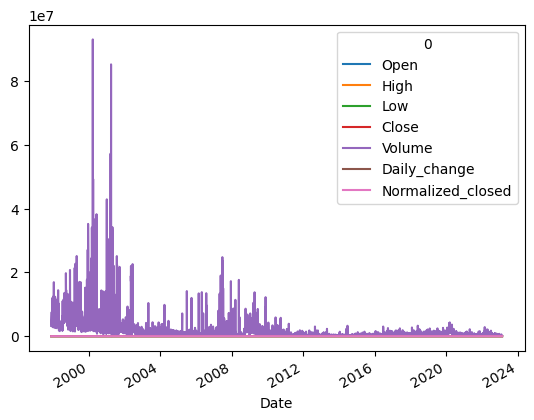

In [89]:
# here we use pandas plot function.
dbbank_df.plot()

But for better control over the axis levels, legends, title, we will use matplotlib.

Text(0.5, 1.0, 'Deutsch Bank (1997-2023)')

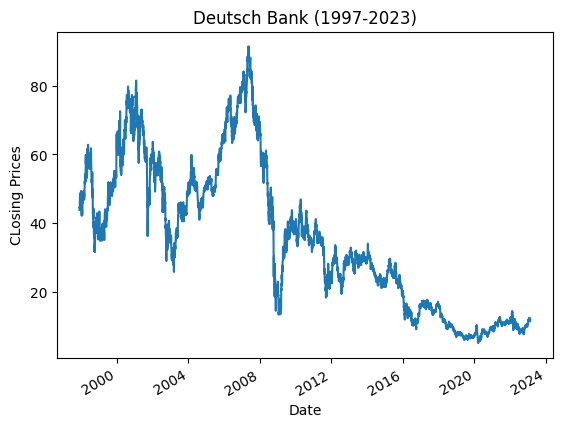

In [93]:
fig, ax = plt.subplots()
dbbank_df['Close'].plot(ax=ax)
ax.set_ylabel("CLosing Prices")
ax.set_title('Deutsch Bank (1997-2023)')

SO what we find here is that, matplotlib here don't understand that Date is here not a column but a index column. 

<AxesSubplot: xlabel='Date'>

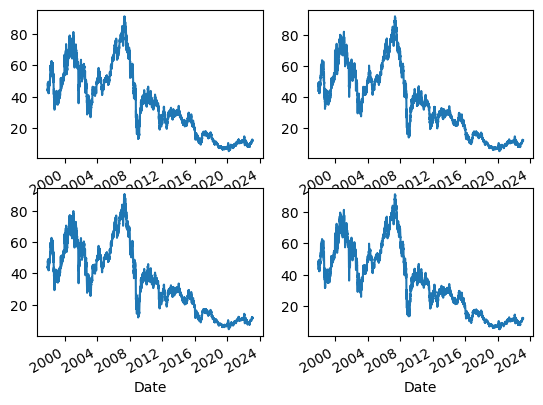

In [98]:
fig, ax = plt.subplots(2,2)
dbbank_df['Open'].plot(ax=ax[0,0], title= 'Open') # type: ignore
dbbank_df['High'].plot(ax=ax[0,1], title= 'High') # type: ignore
dbbank_df['Low'].plot(ax=ax[1,0], title= 'Low') # type: ignore
dbbank_df['Close'].plot(ax=ax[1,1], title= 'Close') # type: ignore

<AxesSubplot: xlabel='Date'>

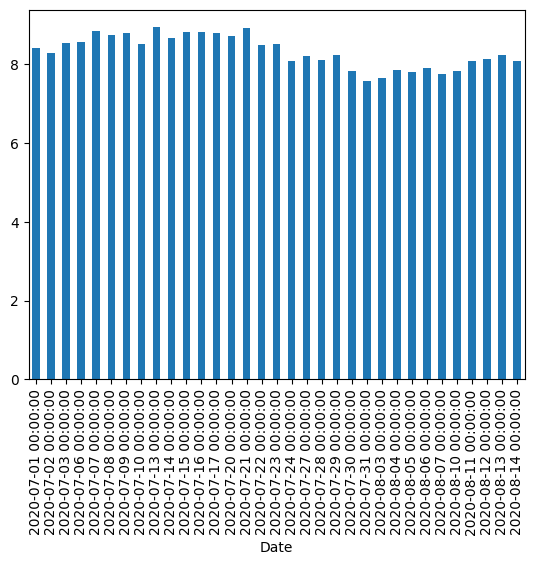

In [104]:
fig, ax = plt.subplots()
dbbank_df['Open'].loc['2020-07-01':'2020-08-15'].plot.bar(ax=ax)  # type: ignore

In [129]:
dbbank_df.head()

,Open,High,Low,Close,Volume,Daily_change,Normalized_closed
Date,,,,,,,
1997-11-28,43.93,44.04,43.71,43.79,3196812,0.14,1.000000
1997-12-01,44.53,44.82,44.41,44.49,4185032,0.04,1.015985
1997-12-02,45.01,45.05,44.45,44.53,3881885,0.48,1.016899
1997-12-03,43.89,44.33,43.66,44.33,4823253,-0.44,1.012332
1997-12-04,44.47,44.95,44.10,44.66,4539136,-0.19,1.019868


##### 2.1. Closing price (yearwise)

Now we need to change the 'Date' column from index to a regular column. To do this, we can use the `reset_index()`.

In [130]:
dbbank_df.reset_index(inplace=True)

In [131]:
dbbank_df.head()

,Date,Open,High,Low,Close,Volume,Daily_change,Normalized_closed
0,1997-11-28,43.93,44.04,43.71,43.79,3196812,0.14,1.000000
1,1997-12-01,44.53,44.82,44.41,44.49,4185032,0.04,1.015985
2,1997-12-02,45.01,45.05,44.45,44.53,3881885,0.48,1.016899
3,1997-12-03,43.89,44.33,43.66,44.33,4823253,-0.44,1.012332
4,1997-12-04,44.47,44.95,44.10,44.66,4539136,-0.19,1.019868


In [133]:
# Finding the data for 2022
# Convert the 'Date' column to datetime format
dbbank_df['Date'] = pd.to_datetime(dbbank_df['Date'])
dbbank_df2022 = dbbank_df[dbbank_df['Date'].dt.year == 2022]
dbbank_df2022.head()

,Date,Open,High,Low,Close,Volume,Daily_change,Normalized_closed
6105,2022-01-03,11.04,11.36,11.04,11.32,183211,-0.28,0.258507
6106,2022-01-04,11.35,11.73,11.35,11.67,688352,-0.32,0.266499
6107,2022-01-05,11.66,11.95,11.62,11.71,541160,-0.05,0.267413
6108,2022-01-06,11.65,12.30,11.65,12.27,735427,-0.62,0.280201
6109,2022-01-07,12.36,12.47,12.13,12.40,647930,-0.04,0.283170


In [134]:
# Finding the data for 2021
dbbank_df2021 = dbbank_df[dbbank_df['Date'].dt.year == 2021]
dbbank_df2021.head()

,Date,Open,High,Low,Close,Volume,Daily_change,Normalized_closed
5850,2021-01-04,8.99,9.02,8.73,8.80,710306,0.19,0.200959
5851,2021-01-05,8.78,8.94,8.75,8.87,400596,-0.09,0.202558
5852,2021-01-06,8.93,9.43,8.89,9.42,970558,-0.49,0.215118
5853,2021-01-07,9.42,9.58,9.18,9.51,879142,-0.09,0.217173
5854,2021-01-08,9.55,9.65,9.45,9.45,518616,0.10,0.215803


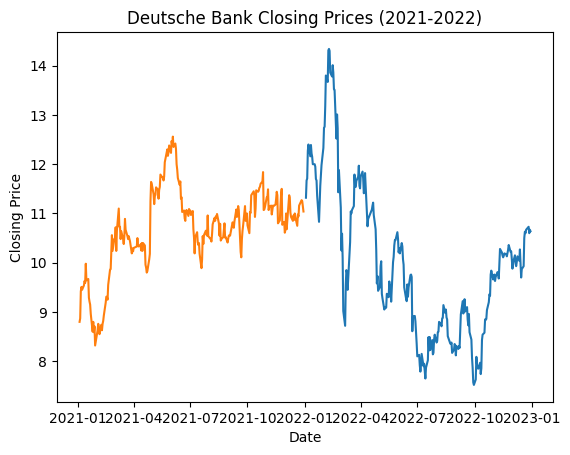

In [135]:
# plot the closing price 2021 and 2022 together
plt.plot(dbbank_df2022['Date'], dbbank_df2022['Close'])
plt.plot(dbbank_df2021['Date'], dbbank_df2021['Close'])
plt.title('Deutsche Bank Closing Prices (2021-2022)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

##### Calculating simple things

1. Percentage chanages: The `pct_change()` function used in the first line calculates the percentage change between the current and a prior element, by default, the prior element is the element in the previous row. 
2. Log Returns
3. Standard deviation (Volatility)
4. Rolling
    - Simple Moving average
    - Exponential Moving average

**Standard Deviation:**

- $\sigma_p=\sigma_{\rm daily}\times \sqrt{p}$
- $\sigma_{\rm annualy} = \sigma_{\rm daily}\times \sqrt{252}$ (here 252 trading days per year).

##### 2.2. Calculate returns

In [137]:
# Adding a %-change column to the dataframe
dbbank_df['pctchg_Close'] = dbbank_df['Close'].pct_change()
dbbank_df.head()

,Date,Open,High,Low,Close,Volume,Daily_change,Normalized_closed,pctchg_Close
0,1997-11-28,43.93,44.04,43.71,43.79,3196812,0.14,1.000000,NaN
1,1997-12-01,44.53,44.82,44.41,44.49,4185032,0.04,1.015985,0.015985
2,1997-12-02,45.01,45.05,44.45,44.53,3881885,0.48,1.016899,0.000899
3,1997-12-03,43.89,44.33,43.66,44.33,4823253,-0.44,1.012332,-0.004491
4,1997-12-04,44.47,44.95,44.10,44.66,4539136,-0.19,1.019868,0.007444


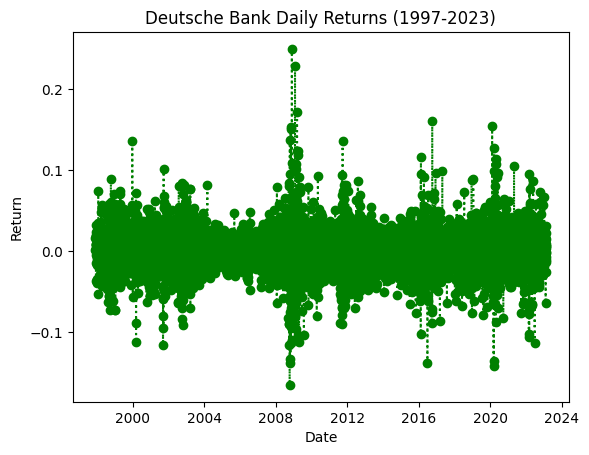

In [138]:
# calculate daily returns
dbbank_df['Return'] = dbbank_df['Close'].pct_change()
# plot the returns over time
plt.plot(dbbank_df['Date'], dbbank_df['Return'], 'go:')
plt.title('Deutsche Bank Daily Returns (1997-2023)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

In the case of the `dbbank_df['Return']` column, `pct_change()` is applied to the `Close` column of the DataFrame, which contains the closing prices of Deutsche Bank's stock. The resulting `Return` column contains the daily percentage changes in the stock price.

If you want to specify a window for the calculation of returns, you can use the `rolling()` function provided by pandas (discussed below). For example, to calculate the 10-day rolling average of daily returns, you can modify the first line of the code as follows:

In [139]:
dbbank_df['Close'].pct_change().rolling(10).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
6392   -0.006814
6393   -0.005161
6394   -0.007197
6395    0.002286
6396    0.002799
Name: Close, Length: 6397, dtype: float64

If we want to see the 

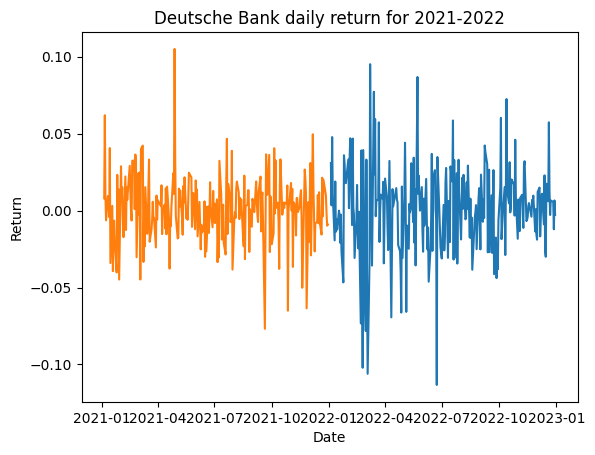

In [140]:
# plot the closing price 2021 and 2022 together
plt.plot(dbbank_df2022['Date'], dbbank_df2022['Close'].pct_change())
plt.plot(dbbank_df2021['Date'], dbbank_df2021['Close'].pct_change())
plt.title('Deutsche Bank daily return for 2021-2022')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

Calculating current close and previous closing value

In [141]:
dbbank_df.tail()

,Date,Open,High,Low,Close,Volume,Daily_change,Normalized_closed,pctchg_Close,Return
6392,2023-02-13,11.32,11.42,11.30,11.41,30606,-0.09,0.260562,0.008842,0.008842
6393,2023-02-14,11.38,11.60,11.38,11.58,26132,-0.20,0.264444,0.014899,0.014899
6394,2023-02-15,11.56,11.56,11.40,11.42,9519,0.14,0.260790,-0.013817,-0.013817
6395,2023-02-16,11.49,11.85,11.49,11.77,38652,-0.28,0.268783,0.030648,0.030648
6396,2023-02-17,11.80,12.06,11.77,11.81,90125,-0.01,0.269696,0.003398,0.003398


In [142]:
# Retrieve the current close and previous closing value
current_close = dbbank_df['Close'].iloc[-1]
previous_close = dbbank_df['Close'].iloc[-2]

# Print the values
print("Current Close:", current_close)
print("Previous Close:", previous_close)
print("5 Day Back closing Price :",dbbank_df['Close'].iloc[-6])

Current Close: 11.81
Previous Close: 11.77
5 Day Back closing Price : 11.31


In this code, we are first selecting the `Close` column from the dataframe using `df['Close']`. We then use the iloc function to select the last row (`iloc[-1]`) and second last row (`iloc[-2]`) from this column to get the current and previous closing values respectively. Finally, we print the values using the `print()` function.

In [143]:
dbbank_df.head()

,Date,Open,High,Low,Close,Volume,Daily_change,Normalized_closed,pctchg_Close,Return
0,1997-11-28,43.93,44.04,43.71,43.79,3196812,0.14,1.000000,NaN,NaN
1,1997-12-01,44.53,44.82,44.41,44.49,4185032,0.04,1.015985,0.015985,0.015985
2,1997-12-02,45.01,45.05,44.45,44.53,3881885,0.48,1.016899,0.000899,0.000899
3,1997-12-03,43.89,44.33,43.66,44.33,4823253,-0.44,1.012332,-0.004491,-0.004491
4,1997-12-04,44.47,44.95,44.10,44.66,4539136,-0.19,1.019868,0.007444,0.007444


##### 2.3. Volatility 

In finance, volatility refers to the degree of variation of a financial instrument's price over time. It is often measured as the standard deviation of the instrument's returns over a specific time period. The formula for calculating volatility is as follows:

$\text{volatility} = \sqrt{\frac{\sum{(R_i - R_{\rm avg})^2}}{(n-1)}}$

Where:

- $R_i$ is the return for a given day or time period
- $R_{\rm avg}$ is the average return over the same period
- $n$ is the number of days or time periods being analyzed

The formula can be simplified as follows:

`volatility = sqrt(variance)`

Where:

- variance is the average of the squared differences between each day's return and the average return over the same period.

In practice, the volatility of a financial instrument is usually calculated using historical data, and may be annualized or adjusted for other factors such as risk-free rates or dividends.

In summary, volatility is standard deviation.

**Standard Deviation:**

- $\sigma_p=\sigma_{\rm daily}\times \sqrt{p}$
- $\sigma_{\rm annualy} = \sigma_{\rm daily}\times \sqrt{252}$ (here 252 trading days per year).

In [144]:
dbbank_df['Log Return'] = np.log(dbbank_df['Close']/dbbank_df['Close'].shift())
dbbank_df.head()

,Date,Open,High,Low,Close,Volume,Daily_change,Normalized_closed,pctchg_Close,Return,Log Return
0,1997-11-28,43.93,44.04,43.71,43.79,3196812,0.14,1.000000,NaN,NaN,NaN
1,1997-12-01,44.53,44.82,44.41,44.49,4185032,0.04,1.015985,0.015985,0.015985,0.015859
2,1997-12-02,45.01,45.05,44.45,44.53,3881885,0.48,1.016899,0.000899,0.000899,0.000899
3,1997-12-03,43.89,44.33,43.66,44.33,4823253,-0.44,1.012332,-0.004491,-0.004491,-0.004501
4,1997-12-04,44.47,44.95,44.10,44.66,4539136,-0.19,1.019868,0.007444,0.007444,0.007417


This line of code is calculating the logarithmic returns of the `Close` price column in the `dbbank_df` DataFrame.

The formula used to calculate logarithmic returns is:

$\text{log(Return)}= \text{log}(\frac{P_t}{P_{(t-1)}})$

where $P_t$ is the current price and $P_{(t-1)}$ is the previous price.

In this code, we're dividing the current 'Close' price by the previous 'Close' price using the `.shift()` method (here it shift the row one down in close column), and then taking the logarithm of that ratio using the `np.log()` function. This gives us the logarithmic return for each trading day.

The calculated logarithmic returns are being stored in a new column called 'Log Return' in the 'dbbank_df' DataFrame.

In [145]:
# standard deviation (daily)
dbbank_df['Log Return'].std()

0.025135172324298804

Annual Volatility: $\sigma_{\rm annualy} = \sigma_{\rm daily}\times \sqrt{252}$

In [147]:
Voltility = dbbank_df['Log Return'].std()*252**.5
Voltility

0.3990084907850879

In [154]:
str_vol = str(round(Voltility, 2)*100)

str_vol

'40.0'

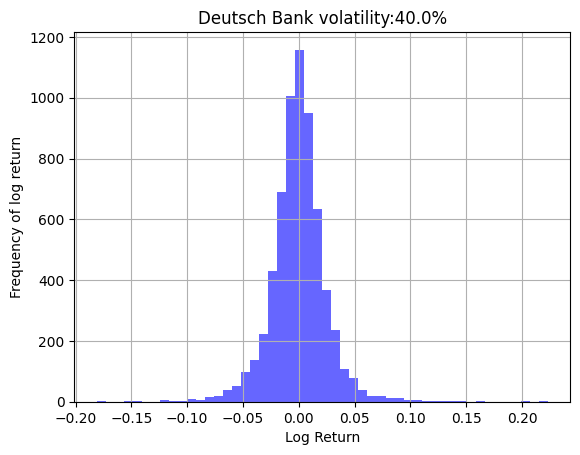

In [155]:
fig, ax = plt.subplots()
dbbank_df['Log Return'].hist(ax=ax, bins = 50, alpha=0.6, color ='b')
ax.set_xlabel('Log Return')
ax.set_ylabel('Frequency of log return')
ax.set_title("Deutsch Bank volatility:" + str_vol + "%")
plt.show()

##### 2.4. Rolling statistics
You can use pandas to calculate rolling statistics such as rolling mean, rolling standard deviation, and rolling correlation.

- Rolling average
- Rolling standard deviation
- Rolling correlation

In [157]:
dbbank_df.head()

,Date,Open,High,Low,Close,Volume,Daily_change,Normalized_closed,pctchg_Close,Return,Log Return
0,1997-11-28,43.93,44.04,43.71,43.79,3196812,0.14,1.000000,NaN,NaN,NaN
1,1997-12-01,44.53,44.82,44.41,44.49,4185032,0.04,1.015985,0.015985,0.015985,0.015859
2,1997-12-02,45.01,45.05,44.45,44.53,3881885,0.48,1.016899,0.000899,0.000899,0.000899
3,1997-12-03,43.89,44.33,43.66,44.33,4823253,-0.44,1.012332,-0.004491,-0.004491,-0.004501
4,1997-12-04,44.47,44.95,44.10,44.66,4539136,-0.19,1.019868,0.007444,0.007444,0.007417


In [160]:
# Calculate rolling mean with window size 30
dbbank_df['MA10'] = dbbank_df['Close'].rolling(window=10).mean()

In [165]:
# Exponential Moving Average
dbbank_df['EMA10'] = dbbank_df['Close'].ewm(span=10, adjust= False).mean()
dbbank_df.head()

,Date,Open,High,Low,Close,Volume,Daily_change,Normalized_closed,pctchg_Close,Return,Log Return,MA10,EMA10
0,1997-11-28,43.93,44.04,43.71,43.79,3196812,0.14,1.000000,NaN,NaN,NaN,NaN,43.790000
1,1997-12-01,44.53,44.82,44.41,44.49,4185032,0.04,1.015985,0.015985,0.015985,0.015859,NaN,43.917273
2,1997-12-02,45.01,45.05,44.45,44.53,3881885,0.48,1.016899,0.000899,0.000899,0.000899,NaN,44.028678
3,1997-12-03,43.89,44.33,43.66,44.33,4823253,-0.44,1.012332,-0.004491,-0.004491,-0.004501,NaN,44.083464
4,1997-12-04,44.47,44.95,44.10,44.66,4539136,-0.19,1.019868,0.007444,0.007444,0.007417,NaN,44.188288


In [173]:
# we need to reset Date column as index
dbbank_df = dbbank_df.set_index('Date')

In [175]:
dbbank_df.head()

,Open,High,Low,Close,Volume,Daily_change,Normalized_closed,pctchg_Close,Return,Log Return,MA10,EMA10
Date,,,,,,,,,,,,
1997-11-28,43.93,44.04,43.71,43.79,3196812,0.14,1.000000,NaN,NaN,NaN,NaN,43.790000
1997-12-01,44.53,44.82,44.41,44.49,4185032,0.04,1.015985,0.015985,0.015985,0.015859,NaN,43.917273
1997-12-02,45.01,45.05,44.45,44.53,3881885,0.48,1.016899,0.000899,0.000899,0.000899,NaN,44.028678
1997-12-03,43.89,44.33,43.66,44.33,4823253,-0.44,1.012332,-0.004491,-0.004491,-0.004501,NaN,44.083464
1997-12-04,44.47,44.95,44.10,44.66,4539136,-0.19,1.019868,0.007444,0.007444,0.007417,NaN,44.188288


Text(0.5, 1.0, 'MA10, EMA10, Closing prices, std for 2019-2023')

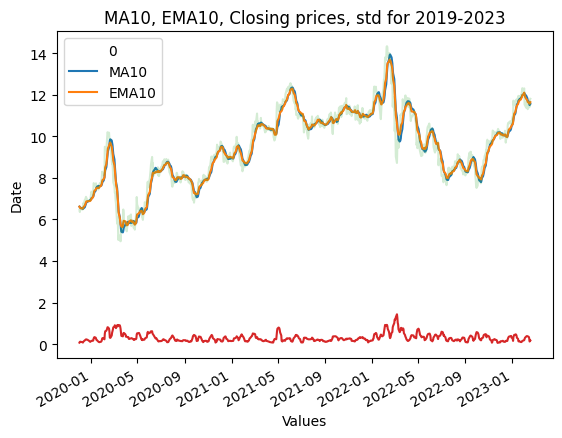

In [192]:
fig, ax = plt.subplots()
dbbank_df[['MA10', 'EMA10']].loc['2019-12-01':].plot(ax=ax)
dbbank_df['Close'].loc['2019-12-01':].plot(ax=ax, alpha=0.2)
# Calculate rolling standard deviation with window size 10 and then plotting
dbbank_df['Close'].rolling(window=10).std().loc['2019-12-01':].plot()
ax.set_xlabel('Values')
ax.set_ylabel('Date')
ax.set_title("MA10, EMA10, Closing prices, std for 2019-2023")

##### 2.5. Moving average convergence divergence (MACD)

- MACD is a lagging indicator when trading on the crossovers
- https://www.investopedia.com/terms/m/macd.asp

Calculation: 

- MACD = 12-period EMA - 26-Period EMA
- Signal line 9-period EMA of MACD

We can use pandas to calculate the MACD, a popular technical indicator used in trading.

In [196]:
dbbank_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_change',
       'Normalized_closed', 'pctchg_Close', 'Return', 'Log Return', 'MA10',
       'EMA10'],
      dtype='object', name=0)

In [197]:
dbbank_dfcopy = dbbank_df.drop(['Daily_change', 'Normalized_closed', 'pctchg_Close', 'Return', 'Log Return', 'MA10', 'EMA10'], axis=1)
dbbank_dfcopy.head()

,Open,High,Low,Close,Volume
Date,,,,,
1997-11-28,43.93,44.04,43.71,43.79,3196812
1997-12-01,44.53,44.82,44.41,44.49,4185032
1997-12-02,45.01,45.05,44.45,44.53,3881885
1997-12-03,43.89,44.33,43.66,44.33,4823253
1997-12-04,44.47,44.95,44.10,44.66,4539136


In [198]:
exp1 = dbbank_dfcopy['Close'].ewm(span=12, adjust= False).mean()
exp2 = dbbank_dfcopy['Close'].ewm(span=26, adjust= False).mean()
dbbank_dfcopy['MACD'] = exp1-exp2
dbbank_dfcopy['Signal line'] = dbbank_dfcopy['MACD'].ewm(span=9, adjust = False).mean()

In [200]:
dbbank_dfcopy.tail()

,Open,High,Low,Close,Volume,MACD,Signal line
Date,,,,,,,
2023-02-13,11.32,11.42,11.30,11.41,30606,0.044457,0.166271
2023-02-14,11.38,11.60,11.38,11.58,26132,0.036226,0.140262
2023-02-15,11.56,11.56,11.40,11.42,9519,0.016601,0.115529
2023-02-16,11.49,11.85,11.49,11.77,38652,0.028956,0.098215
2023-02-17,11.80,12.06,11.77,11.81,90125,0.041497,0.086871


Text(0, 0.5, 'Close Price')

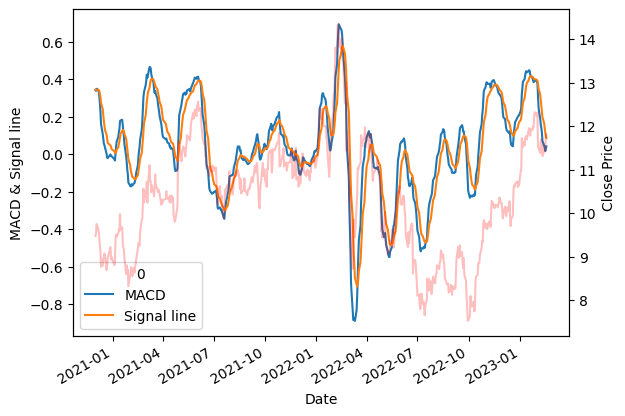

In [206]:
# Now lets plot it for the duration of 2020-2023
fig, ax = plt.subplots()
dbbank_dfcopy[['MACD', 'Signal line']].loc['2020-12-01':].plot(ax=ax)
dbbank_dfcopy['Close'].loc['2020-12-01':].plot(ax=ax, color= 'r', alpha=0.25, secondary_y= True)
ax.set_xlabel('Date')
ax.set_ylabel('MACD & Signal line')
ax.right_ax.set_ylabel('Close Price')

##### 2.6. Stochastic oscillator

- Lagging indicator
- https://www.investopedia.com/terms/s/stochasticoscillator.asp

Calculation: 
- 14-high: Maximum of last 14 trading days.
- 14-low: Minimum of last 14 trading days.
- %K: (Last close-14-low)*100/(14-high - 14-low)
- %D: Simple Moving Average of %K.

#### 4. Analyze relationships between variables
You can use seaborn to create scatter plots and regression plots to explore the relationships between variables. 

In [ ]:
sns.set(style='whitegrid')
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='Open', y='Close', color="blue")
plt.title('Deutsche Bank Open vs. Close')
plt.show()

In [ ]:
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='High', y='Low')
plt.title('Deutsche Bank High vs. Low')
plt.show()

In [ ]:
dbbank_df.columns

In [ ]:
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='High', y='Volume (shares)', color="g")
plt.title('Deutsche Bank Open vs. Close')
plt.show()

In [ ]:
#Scatter Plot with Regression Line using Seaborn
sns.regplot(data=dbbank_df, y='Return', x='Volume (shares)', color = 'g')

**Note:** Regression line: A regression line is an estimate of the line that describes the true, but unknown, linear relationship between the two variables.

Clearly the two variables doesnot show a strong relationship.

In [ ]:
#Scatter Plot with Regression Line using Seaborn
sns.regplot(data=dbbank_df, y='High', x='Volume (shares)')

In this case, we can say that, wheen volume is high, the share prices go high. 

In [ ]:
# Scatter Plot with Marginal Histograms along with linear regression
sns.jointplot(data=dbbank_df, x='High', y='Volume (shares)', kind="reg", color='red', marker=".")

**Note:** 

*Marginal distribution:* The marginal distribution of a variable is the probability distribution of that variable alone, ignoring the values of any other variables. For two variables, the marginal distribution of one variable can be obtained by summing the joint probability distribution over all values of the other variable.

> For example, if X and Y are two random variables with joint probability distribution p(X, Y), the marginal distribution of X is given by p(X) = ∑p(X, Y), where the sum is taken over all possible values of Y. Similarly, the marginal distribution of Y can be obtained by summing the joint distribution over all values of X.

> It represents the bi-variate distribution using scatterplot() and the marginal distributions using histplot().

6. **Correlation:**

    To calculate correlations, we need to calculate the shifted value.

    > Shifting the rows in this case can be useful for calculating changes in the 'High' column values between consecutive time periods. By shifting the 'High' column one row downwards, you can compare each value with its previous value and calculate the change.

    > For example, if you subtract the shifted 'High' column from the original 'High' column, you get a new column that contains the difference in 'High' values between each consecutive time period. This can be useful for calculating metrics like daily price changes or volatility.

    > `dbbank_df['high_change'] = dbbank_df['High'] - dbbank_df['High'].shift()`

    > In this code, the shift() method is used to shift the 'High' column one row downwards, so that each value in the 'High' column is now compared with its previous value. Note that the first value in the 'high_change' column will be `NaN`, as there is no previous value to subtract from the first row.

In [ ]:
# Create another column with shifted values of 'value' column
dbbank_df['shifted_high'] = dbbank_df['High'].shift()
dbbank_df['shifted_low'] = dbbank_df['Low'].shift()
dbbank_df['shifted_close'] = dbbank_df['Close'].shift()

we notice here that Date is used here as index as well as Column. This is due to the fact that we need some times Date as column.

In [ ]:
# Calculate rolling correlation with window size 10
rollinghigh_corr = dbbank_df['High'].rolling(window=10).corr(dbbank_df['shifted_high'])
rollinglow_corr = dbbank_df['Low'].rolling(window=10).corr(dbbank_df['shifted_low'])
rollingClose_corr = dbbank_df['Close'].rolling(window=10).corr(dbbank_df['shifted_close'])

In [ ]:
plt.plot(dbbank_df['High'], label='High')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.plot(rollinghigh_corr, label='Correlation High')
plt.legend()
plt.show()

clearly, high value does not correlations show any correlation.

In [ ]:
plt.plot(rollinghigh_corr, label='Correlation high with year')
plt.plot(rollinglow_corr, label='Correlation low with year')
plt.plot(rollingClose_corr, label='Correlation close with year')
plt.legend()
plt.show()

In [ ]:
plt.plot(dbbank_df['Close'], label='Close')
plt.plot(rollingClose_corr, label='Correlation, close')
plt.legend()
plt.show()

#### 6. Moving average convergence divergence (MACD)
You can use pandas to calculate the MACD, a popular technical indicator used in trading. For example, to calculate the 12-day and 26-day exponential moving averages and the MACD:

In [ ]:
# calculate 12-day and 26-day exponential moving averages
ema12 = dbbank_df['Close'].ewm(span=12, adjust=False).mean()
ema26 = dbbank_df['Close'].ewm(span=26, adjust=False).mean()
# calculate MACD
macd = ema12 - ema26
# plot the MACD over time
plt.plot(dbbank_df['Date'], macd, label = 'MACD')
plt.plot(dbbank_df['Date'], dbbank_df['Close'], label= "Close")
plt.title('Deutsche Bank 2000-2023')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

#### 7. Bollinger Bands
You can use pandas to calculate Bollinger Bands, another popular technical indicator used in trading.

In [ ]:
# calculate 20-day moving average and standard deviation
dbbank_df['MA20'] = dbbank_df['Close'].rolling(window=20).mean()
dbbank_df['StdDev'] = dbbank_df['Close'].rolling(window=20).std()
# calculate upper and lower Bollinger Bands
dbbank_df['UpperBand'] = dbbank_df['MA20'] + 2 * dbbank_df['StdDev']
dbbank_df['LowerBand'] = dbbank_df['MA20'] - 2 * dbbank_df['StdDev']
# plot the Bollinger Bands over time
plt.plot(dbbank_df['Date'], dbbank_df['Close'])
plt.plot(dbbank_df['Date'], dbbank_df['MA20'])
plt.plot(dbbank_df['Date'], dbbank_df['UpperBand'])
plt.plot(dbbank_df['Date'], dbbank_df['LowerBand'])
plt.title('Deutsche Bank Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

#### 8. Compare with market indices
You can use pandas to download and compare the Deutsche Bank share data with market indices such as the DAX, FTSE, or S&P 500. For example, to download the DAX data and compare it with the Deutsche Bank share data:

1. aapl_df = apple
2. bac_df = Bank of amerika
3. citi_df = citibank
4. gs_df = Goldman Sachs
5. jpm_df = JPMorgan
6. ms_df = morgan Stanlay

Columns:
Date	| Open	| High	| Low	| Close	| Adj Close	| Volume |

In [ ]:
%pip install --upgrade pandas-datareader --upgrade --quiet

In [ ]:
aapl_dfcopy = aapl_df.drop('Adj Close', axis=1)

In [ ]:
bac_dfcopy = bac_df.drop('Adj Close', axis=1)

In [ ]:
citi_dfcopy = citi_df.drop('Adj Close', axis=1)

In [ ]:
gs_dfcopy = gs_df.drop('Adj Close', axis=1)

In [ ]:
jpm_dfcopy = jpm_df.drop('Adj Close', axis=1)

In [ ]:
ms_dfcopy =ms_df.drop('Adj Close', axis=1)

In [ ]:
dbbank_dfnew = dbbank_df.drop(['shifted_high', 'shifted_low', 'shifted_close', 'MA20', 'StdDev', 'UpperBand', 'LowerBand'], axis=1)

In [ ]:
merge1_df = pd.concat([dbbank_dfnew, aapl_dfcopy, bac_dfcopy, citi_dfcopy, gs_dfcopy, jpm_dfcopy, ms_dfcopy], axis=1, ignore_index=True)

In [ ]:
start_date = 2006-01-03
end_date = 2023-02-16

In [ ]:
merged2_df = dbbank_df.merge(aapl_dfcopy, on='Date', how='left')
merged2_df

In [ ]:
df['Returns_DAX'] = dbbank_df['Close_dax'].pct_change()
# plot the daily returns for Deutsche Bank and DAX over time
plt.plot(dbbank_df['Date'], dbbank_df['Returns'], label='Deutsche Bank')
plt.plot(dbbank_df['Date'], dbbank_df['Returns_DAX'], label='DAX')
plt.title('Deutsche Bank vs. DAX Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

```
 # merge DAX data with Deutsche Bank share data
df = pd.merge(dbbank_df, aapl_dfcopy, bac_dfcopy, citi_dfcopy, gs_dfcopy, jpm_dfcopy, ms_dfcopy , on='Date', suffixes=('_db', '_dax'))
# calculate daily returns for DAX
df['Returns_DAX'] = dbbank_df['Close_dax'].pct_change()
# plot the daily returns for Deutsche Bank and DAX over time
plt.plot(dbbank_df['Date'], dbbank_df['Returns'], label='Deutsche Bank')
plt.plot(dbbank_df['Date'], dbbank_df['Returns_DAX'], label='DAX')
plt.title('Deutsche Bank vs. DAX Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

#### 9. Perform statistical analysis
You can use pandas to perform statistical analysis on the Deutsche Bank share data. For example, to calculate the mean, standard deviation, and correlation coefficient of the closing price and volume:

In [ ]:
dbbank_df.head()

In [ ]:
# calculate mean, standard deviation, and correlation coefficient of closing price and volume
mean_close = dbbank_df['Close'].mean()
std_close = dbbank_df['Close'].std()
mean_volume = dbbank_df['Volume (shares)'].mean()
std_volume = dbbank_df['Volume (shares)'].std()
corr = dbbank_df['Close'].corr(dbbank_df['Volume (shares)'])
print('Mean closing price:', mean_close)
print('Standard deviation of closing price:', std_close)
print('Mean volume:', mean_volume)
print('Standard deviation of volume:', std_volume)
print('Correlation coefficient of closing price and volume:', corr)

# Downloading other share prices

In [105]:
%pip install yfinance --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [107]:
import pandas_datareader.data as pdr
import yfinance as yf

In [109]:
import datetime as dt

In [118]:
%pip install pandas-datareader --upgrade -q


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Get the data for the stock AAPL
aapl_df = yf.download('AAPL','2006-01-01','2023-02-17')
aapl_df = aapl_df.reset_index()
aapl_df

In [ ]:
# Bank of Amerika
bac_df = yf.download('BAC','2006-01-01','2023-02-17')
bac_df = bac_df.reset_index()
bac_df

In [ ]:
# Citigroup
citi_df = yf.download('C','2006-01-01','2023-02-17')
citi_df = citi_df.reset_index()
citi_df

In [ ]:
# Goldman Sachs
gs_df = yf.download('GS','2006-01-01','2023-02-17')
gs_df = gs_df.reset_index()
gs_df

In [ ]:
# JPMorgan Chase
jpm_df = yf.download('JPM','2006-01-01','2023-02-17')
jpm_df = jpm_df.reset_index()
jpm_df

In [ ]:
# Morgan Stanlay
ms_df = yf.download('MS','2006-01-01','2023-02-17')
ms_df = ms_df.reset_index()
ms_df

In [ ]:
# Wells Fargo
wf_df = yf.download('WF','2006-01-01','2023-02-17')
wf_df = wf_df.reset_index()
wf_df

In [ ]:
# create a dictionary with the dataframes
dfs = {'df1': dbbank_df, 
       'df2': aapl_df,
       'df3': bac_df,
       'df4': citi_df,
       'df5': gs_df,
       'df6': jpm_df,
       'df7': ms_df}
dfs

In [ ]:
dfs.keys()

Extra for future reference

In [122]:
# Set the ticker symbol for Deutsche Bank
tickerdb = 'DB'
tickerbac = 'BAC'

# Download the live share price data for Deutsche Bank
db_stock_data = yf.download([tickerdb,tickerbac], period='1d', interval='1m')

# Download the live share price data for Deutsche Bank
# bac_stock_data = yf.download(tickerbac, period='1d', interval='1m')

# Create a pandas dataframe from the stock data
db_df = pd.DataFrame(db_stock_data)

# Print the dataframe to verify the data has been imported
db_df

[*********************100%***********************]  2 of 2 completed


Adj Close               Close                High  \
                                 BAC       DB        BAC       DB        BAC   
Datetime                                                                       
2023-02-27 09:30:00-05:00  34.230000  12.2800  34.230000  12.2800  34.509998   
2023-02-27 09:31:00-05:00  34.220001  12.2800  34.220001  12.2800  34.279999   
2023-02-27 09:32:00-05:00  34.323799  12.2800  34.323799  12.2800  34.330002   
2023-02-27 09:33:00-05:00  34.360001  12.2800  34.360001  12.2800  34.369999   
2023-02-27 09:34:00-05:00  34.360001  12.2800  34.360001  12.2800  34.389999   
...                              ...      ...        ...      ...        ...   
2023-02-27 15:55:00-05:00  34.235001  12.2575  34.235001  12.2575  34.240002   
2023-02-27 15:56:00-05:00  34.230099  12.2550  34.230099  12.2550  34.240002   
2023-02-27 15:57:00-05:00  34.215000  12.2550  34.215000  12.2550  34.250000   
2023-02-27 15:58:00-05:00  34.235001  12.2500  34.235001  12.2500  34.235001   
2023-02-27 15:59:00-05:00  34.200001  12.2400  34.200001  12.2400  34.250000   

                                          Low                Open          \
                                DB        BAC       DB        BAC      DB   
Datetime                                                                    
2023-02-27 09:30:00-05:00  12.2850  34.220001  12.2723  34.450001  12.280   
2023-02-27 09:31:00-05:00  12.2900  34.205002  12.2650  34.235001  12.270   
2023-02-27 09:32:00-05:00  12.2850  34.169998  12.2800  34.215000  12.281   
2023-02-27 09:33:00-05:00  12.2900  34.299999  12.2800  34.320000  12.281   
2023-02-27 09:34:00-05:00  12.2900  34.340000  12.2750  34.365002  12.290   
...                            ...        ...      ...        ...     ...   
2023-02-27 15:55:00-05:00  12.2575  34.220001  12.2550  34.235001  12.255   
2023-02-27 15:56:00-05:00  12.2600  34.230000  12.2500  34.230000  12.255   
2023-02-27 15:57:00-05:00  12.2575  34.215000  12.2500  34.235001  12.255   
2023-02-27 15:58:00-05:00  12.2550  34.200001  12.2400  34.215000  12.250   
2023-02-27 15:59:00-05:00  12.2500  34.200001  12.2400  34.240002  12.245   

                            Volume            
                               BAC        DB  
Datetime                                      
2023-02-27 09:30:00-05:00  1127076  129264.0  
2023-02-27 09:31:00-05:00   346740   21065.0  
2023-02-27 09:32:00-05:00   200583    3516.0  
2023-02-27 09:33:00-05:00   177374   11024.0  
2023-02-27 09:34:00-05:00   183201   23783.0  
...                            ...       ...  
2023-02-27 15:55:00-05:00   216288    4719.0  
2023-02-27 15:56:00-05:00   191497    7451.0  
2023-02-27 15:57:00-05:00   357456   10194.0  
2023-02-27 15:58:00-05:00   369894   64869.0  
2023-02-27 15:59:00-05:00   852296   34850.0  

[390 rows x 12 columns]

**Extra;**

The below code shows how to get data for AAPL from 2016 to 2019 and plot the adjusted closing price of the data.

https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836

[*********************100%***********************]  1 of 1 completed


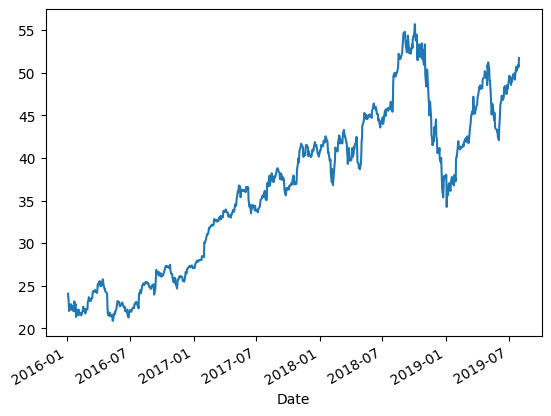

[*********************100%***********************]  1 of 1 completed


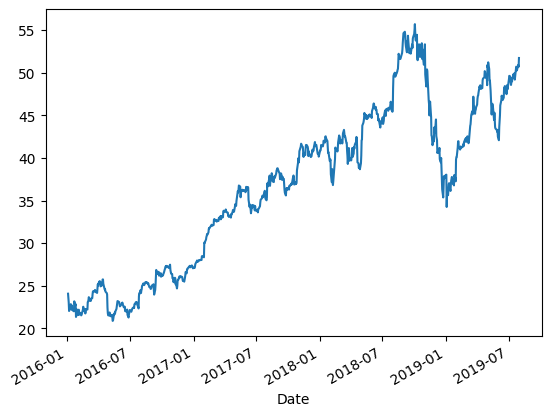

In [123]:
# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2019-08-01')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2019-08-01')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

Data for multiple stocks:

In the below code, we will fetch the data of multiple stocks and store it in a dataframe data. Then we will calculate the daily returns and plot the cumulative returns of all the stock prices using matplotlib package.

In [124]:
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2015-1-1')['Adj Close']

# Print first 5 rows of the data
print(data.head())

[*********************100%***********************]  6 of 6 completed
                 AAPL        AXP          BA         IBM         MU        WMT
Date                                                                          
2015-01-02  24.565697  82.201294  113.657211  108.148598  34.398560  72.252892
2015-01-05  23.873640  80.027428  112.870064  106.446922  33.438370  72.042603
2015-01-06  23.875883  78.321877  111.540634  104.151245  32.537575  72.597763
2015-01-07  24.210686  80.032433  113.272385  103.470573  31.775362  74.523956
2015-01-08  25.140909  81.166885  115.275284  105.719521  33.329479  76.096855


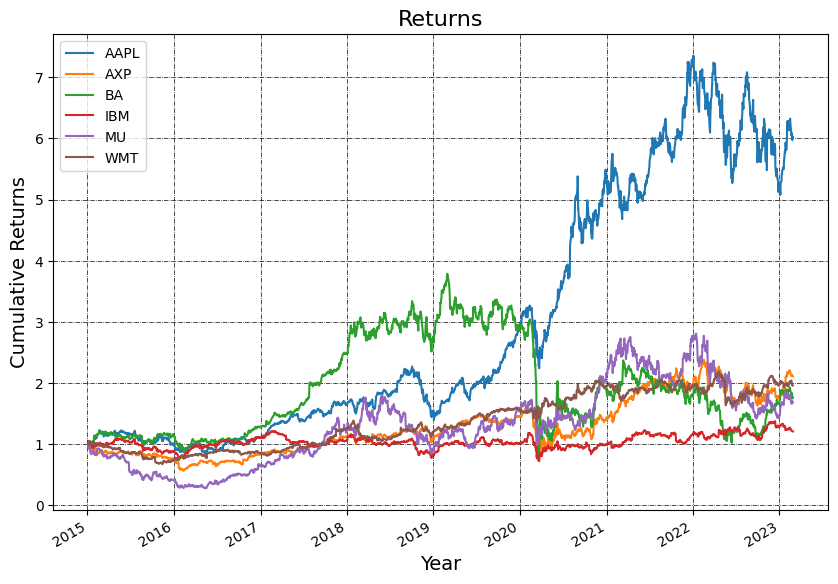

In [125]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Minute level data:

Through yfinance, you can also fetch the data of minute frequency. You can download for other frequency by just tweaking the interval parameter on line no 8 below. Following values are supported in the interval: 1m, 5m, 15m, 30m, 60m.

In [126]:
# Get the data
data = yf.download(tickers="MSFT", period="5d", interval="1m")

# Print the data
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-02-27 15:55:00-05:00  250.190002  250.250000  249.690002  250.139999   
2023-02-27 15:56:00-05:00  250.139999  250.250000  250.110001  250.169998   
2023-02-27 15:57:00-05:00  250.160004  250.300003  250.110001  250.130005   
2023-02-27 15:58:00-05:00  250.119995  250.210007  249.960098  250.160004   
2023-02-27 15:59:00-05:00  250.169998  250.250000  250.020004  250.199997   

                            Adj Close  Volume  
Datetime                                       
2023-02-27 15:55:00-05:00  250.139999  218217  
2023-02-27 15:56:00-05:00  250.169998  105713  
2023-02-27 15:57:00-05:00  250.130005  122323  
2023-02-27 15:58:00-05:00  250.160004  167193  
2023-02-27 15:59:00-05:00  250.199997  397239  


You can analyze this data, create a trading strategy and analyze the performance of the strategy using the pyfolio package. It computes the Sharpe ratio, Sortino ratio, maximum drawdowns and many other metrics.

## Conclusion

Through data analysis, Deutsche Bank is able to identify potential risks associated with its investment products and take appropriate measures to manage those risks. This helps the bank make informed decisions about which products to invest in and which to avoid, ultimately reducing the overall risk of its investment portfolio.

# Reference

1. https://investor-relations.db.com/share/share-information/historical-share-prices
2. https://www.zaner.com/3.0/education/technicalstudies/MA.asp#top
3. https://www.linkedin.com/pulse/stock-data-analysis-using-python-sakshi-grover/ (have to do some of these)